<a href="https://colab.research.google.com/github/Davron030901/Scikit_learning/blob/main/Topshiriq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Colab link](https://colab.research.google.com/drive/1jY-w_mVUCBhZpiVvpaxjwCA5O6Jt3kaF#scrollTo=zQ5d2K5Q7ESf)

In [ ]:
!pip install lightgbm
!pip install xgboost
!pip install imblearn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks
from sklearn.pipeline import Pipeline
import numpy as np
import time

In [ ]:
!wget https://raw.githubusercontent.com/Davron030901/Machine_Learning/main/data/ai4i2020.csv

--2025-01-18 18:31:23--  https://raw.githubusercontent.com/Davron030901/Machine_Learning/main/data/ai4i2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 522048 (510K) [text/plain]
Saving to: ‘ai4i2020.csv.1’

ai4i2020.csv.1      100%[===================>] 509.81K  --.-KB/s    in 0.05s   

2025-01-18 18:31:23 (10.4 MB/s) - ‘ai4i2020.csv.1’ saved [522048/522048]



In [ ]:
df=pd.read_csv('ai4i2020.csv')

In [ ]:
df.isna().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


In [ ]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
df.drop(columns=['UDI',	'Product ID'],inplace=True)

In [ ]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [ ]:
df.columns=['Type', 'Air_temperature_K', 'Process_temperature_K',
       'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min',
       'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

In [ ]:
ord_e=OrdinalEncoder()
df['Type']=ord_e.fit_transform(df[['Type']])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Type                   10000 non-null  float64
 1   Air_temperature_K      10000 non-null  float64
 2   Process_temperature_K  10000 non-null  float64
 3   Rotational_speed_rpm   10000 non-null  int64  
 4   Torque_Nm              10000 non-null  float64
 5   Tool_wear_min          10000 non-null  int64  
 6   Machine_failure        10000 non-null  int64  
 7   TWF                    10000 non-null  int64  
 8   HDF                    10000 non-null  int64  
 9   PWF                    10000 non-null  int64  
 10  OSF                    10000 non-null  int64  
 11  RNF                    10000 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 937.6 KB


In [ ]:
df.describe()

,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,1.19940,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,0.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,2.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


<Axes: >

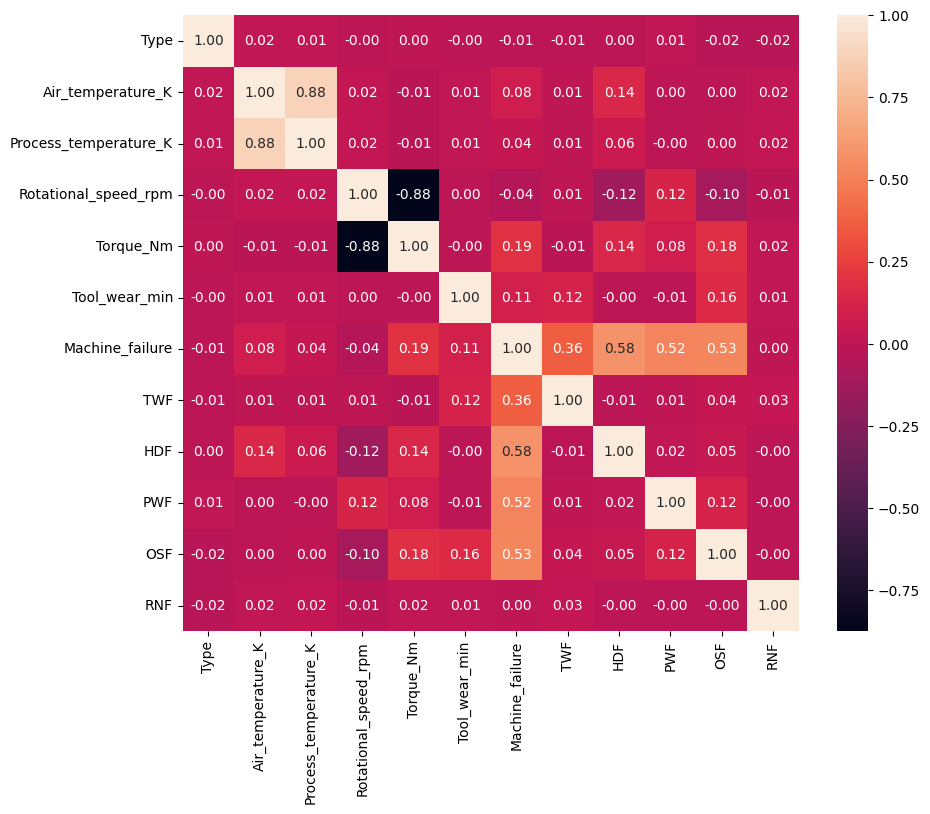

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),square=True,annot=True,fmt='.2f',linecolor='white')

IQR

<Axes: ylabel='Rotational_speed_rpm'>

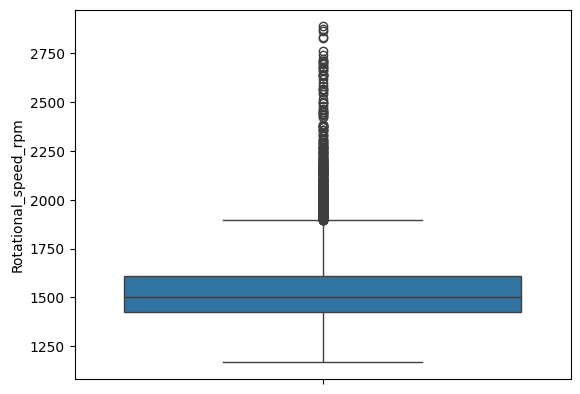

In [ ]:
sns.boxplot(df['Rotational_speed_rpm'])

<Axes: ylabel='Torque_Nm'>

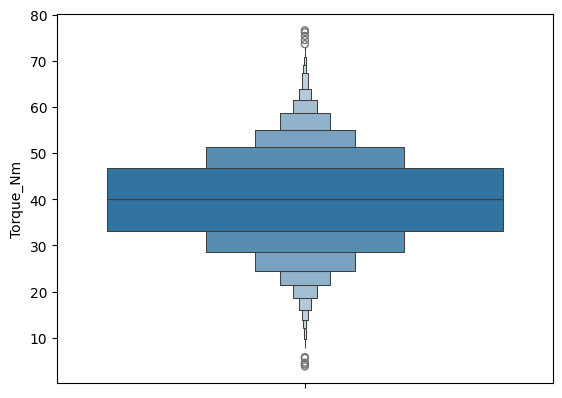

In [ ]:
sns.boxenplot(df['Torque_Nm'])

In [ ]:
df

,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,2.0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,1.0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,1.0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,1.0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,1.0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,0.0,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,2.0,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,0.0,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
df_cleaned = remove_outliers_iqr(df.copy(),'Torque_Nm')
df_cleaned = remove_outliers_iqr(df_cleaned,'Rotational_speed_rpm')

In [ ]:
X=df_cleaned.drop(columns=['Type','Machine_failure', 'TWF', 'HDF', 'OSF', 'RNF'],axis=1)
y=df_cleaned['Machine_failure']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=13)

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

##Choose model

In [ ]:
df_cleaned.columns

Index(['Type', 'Air_temperature_K', 'Process_temperature_K',
       'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 'Machine_failure',
       'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [ ]:
#SIMPLE
X_simple = df_cleaned.drop(['Type','Machine_failure', 'TWF', 'HDF', 'OSF', 'RNF'], axis=1)
y_simple = df_cleaned['Machine_failure']
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=0.15, random_state=42)
# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

# SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_train, y_train)

# Tomek Links
tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X_train, y_train)

In [ ]:
balance_methods = ["ORIGINAL_IQR","SMOTE", "ADASYN", "SMOTEENN", "TomekLinks"]
X_trains = [X_train,X_smote, X_adasyn, X_smoteenn, X_tl]
y_trains = [y_train,y_smote, y_adasyn, y_smoteenn, y_tl]

In [ ]:
from collections import defaultdict
classification_results = defaultdict(lambda: defaultdict(list))

In [ ]:
classification_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000,random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

for method, X_train_method, y_train_method in zip(balance_methods, X_trains, y_trains):
    for model_name, model in classification_models.items():
      start_time = time.time()
      model.fit(X_train_method, y_train_method)
      fit_time = time.time() - start_time

      start_time = time.time()
      y_pred = model.predict(X_test)
      predict_time = time.time() - start_time
      clf_report = classification_report(y_test, y_pred, output_dict=True)
      classification_results[method][model_name].append({
          'accuracy': accuracy_score(y_test, y_pred),
          'precision_0': clf_report['0']['precision'],
          'recall_0': clf_report['0']['recall'],
          'f1_score_0': clf_report['0']['f1-score'],
          'precision_1': clf_report['1']['precision'],
          'recall_1': clf_report['1']['recall'],
          'f1_score_1': clf_report['1']['f1-score'],
          'macro_avg_precision': clf_report['macro avg']['precision'],
          'macro_avg_recall': clf_report['macro avg']['recall'],
          'macro_avg_f1_score': clf_report['macro avg']['f1-score'],
          'weighted_avg_precision': clf_report['weighted avg']['precision'],
          'weighted_avg_recall': clf_report['weighted avg']['recall'],
          'weighted_avg_f1_score': clf_report['weighted avg']['f1-score'],
          'fit_time': fit_time,  # O'rganish vaqti
          'predict_time': predict_time
      })

# Klassifikatsiya natijalari jadvali
results_df = pd.DataFrame.from_dict({(i, j): [classification_results[i][j][0][k] for k in classification_results[i][j][0]]
                           for i in classification_results.keys()
                           for j in classification_results[i].keys()},
                          orient='index')

results_df.columns = list(classification_results[next(iter(classification_results))][next(iter(classification_results[next(iter(classification_results))]))][0].keys())

results_df = results_df.reset_index().rename(columns={'level_0': 'Balance Method', 'level_1': 'Model'})

print("Classification Results:\n")
print(results_df)

results_df.to_csv('classification_model.csv', index=False)

[LightGBM] [Info] Number of positive: 232, number of negative: 7867
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 8099, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028646 -> initscore=-3.523695
[LightGBM] [Info] Start training from score -3.523695
[LightGBM] [Info] Number of positive: 7867, number of negative: 7867
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1271
[LightGBM] [Info] Number of data points in the train set: 15734, number of used features: 6
[LightGBM] [Info] [binary:B

In [ ]:
df=pd.read_csv('classification_model.csv')

In [ ]:
df_sorted=df.sort_values(by='weighted_avg_f1_score',ascending=False)[:5]
df_sorted

,index,accuracy,precision_0,recall_0,f1_score_0,precision_1,recall_1,f1_score_1,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1_score,fit_time,predict_time
49,"('TomekLinks', 'LightGBM')",0.993007,0.993585,0.999283,0.996426,0.962963,0.742857,0.838710,0.978274,0.871070,0.917568,0.992836,0.993007,0.992566,0.125388,0.014723
5,"('ORIGINAL_IQR', 'Gradient Boosting')",0.992308,0.992877,0.999283,0.996070,0.961538,0.714286,0.819672,0.977208,0.856784,0.907871,0.992110,0.992308,0.991753,1.081505,0.003743
9,"('ORIGINAL_IQR', 'LightGBM')",0.992308,0.992877,0.999283,0.996070,0.961538,0.714286,0.819672,0.977208,0.856784,0.907871,0.992110,0.992308,0.991753,0.210663,0.021889
48,"('TomekLinks', 'XGBoost')",0.991608,0.993576,0.997849,0.995708,0.896552,0.742857,0.812500,0.945064,0.870353,0.904104,0.991201,0.991608,0.991224,0.115272,0.008598
45,"('TomekLinks', 'Gradient Boosting')",0.991608,0.992872,0.998566,0.995711,0.925926,0.714286,0.806452,0.959399,0.856426,0.901081,0.991234,0.991608,0.991079,1.399433,0.003810


In [ ]:
df_sorted.sort_values(by='predict_time',ascending=True)[:2]

,index,accuracy,precision_0,recall_0,f1_score_0,precision_1,recall_1,f1_score_1,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1_score,fit_time,predict_time
5,"('ORIGINAL_IQR', 'Gradient Boosting')",0.992308,0.992877,0.999283,0.996070,0.961538,0.714286,0.819672,0.977208,0.856784,0.907871,0.992110,0.992308,0.991753,1.081505,0.003743
45,"('TomekLinks', 'Gradient Boosting')",0.991608,0.992872,0.998566,0.995711,0.925926,0.714286,0.806452,0.959399,0.856426,0.901081,0.991234,0.991608,0.991079,1.399433,0.003810


LightGBM dan TomekLinks optimallashtirish

In [ ]:
gbc_tl=GradientBoostingClassifier(random_state=12)
gbc_tl_scores = cross_val_score(gbc_tl, X_tl, y_tl, cv=10)
print("GradientBoostingClassifier TomekLinks  o'rtacha baho:", gbc_tl_scores.mean())
gbc_org=GradientBoostingClassifier(random_state=12)
gbc_org_scores = cross_val_score(gbc_org, X_train, y_train, cv=10)
print("GradientBoostingClassifier Original IQR o'rtacha baho:", gbc_org_scores.mean())

GradientBoostingClassifier TomekLinks  o'rtacha baho: 0.9854150427169934
GradientBoostingClassifier Original IQR o'rtacha baho: 0.984566375192663


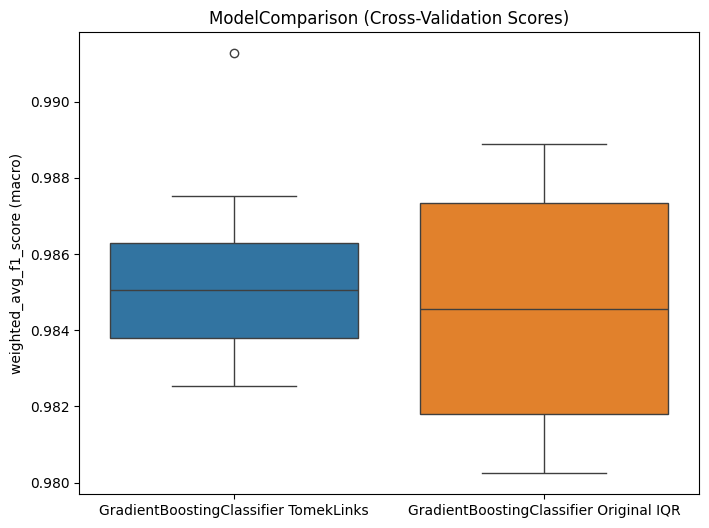

In [ ]:
results = pd.DataFrame({
     'GradientBoostingClassifier TomekLinks': gbc_tl_scores,
     'GradientBoostingClassifier Original IQR': gbc_org_scores})

plt.figure(figsize=(8,6))
sns.boxplot(data=results)
plt.title('ModelComparison (Cross-Validation Scores)')
plt.ylabel('weighted_avg_f1_score (macro)')
plt.show()

In [ ]:
model = Pipeline([
    ('classification', GradientBoostingClassifier(random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1395
           1       0.96      0.71      0.82        35

    accuracy                           0.99      1430
   macro avg       0.98      0.86      0.91      1430
weighted avg       0.99      0.99      0.99      1430

Accuracy: 0.9923076923076923
ROC-AUC Score: 0.98979006656426



Gaussian Naive Bayes TomekLinks - Test Set Results:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1395
           1       0.96      0.71      0.82        35

    accuracy                           0.99      1430
   macro avg       0.98      0.86      0.91      1430
weighted avg       0.99      0.99      0.99      1430

Accuracy: 0.9923076923076923


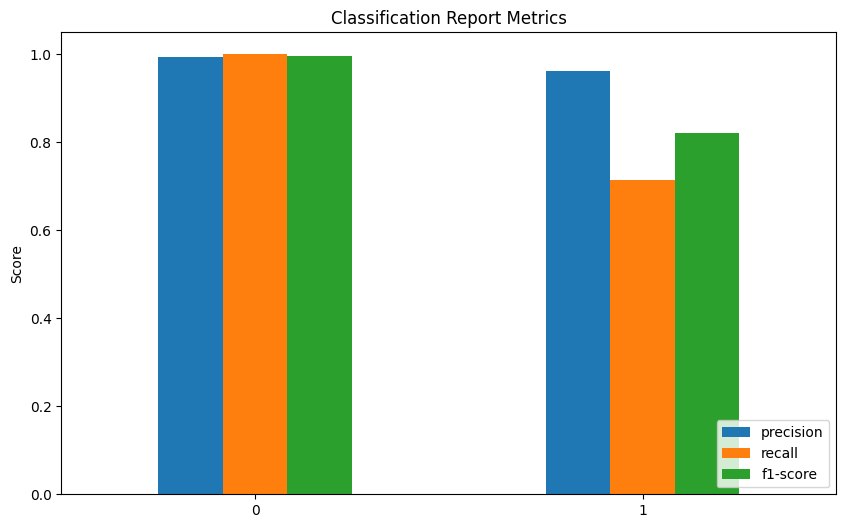

In [ ]:
print("\nGaussian Naive Bayes TomekLinks - Test Set Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report = df_report.drop(['accuracy', 'macro avg', 'weighted avg'])


df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()